Question 1 Part (a)

[ 0.03519016  0.04106206  0.05885948  0.05683611  0.0585952   0.05443284
  0.0550605   0.05067515  0.04785894  0.04083908  0.04269728  0.03509931
  0.03660239  0.03168022  0.02978073  0.0285089   0.0250733   0.02119173
  0.02142297  0.01859025  0.02086964  0.01462609  0.01422967  0.01295784
  0.01271834  0.0103894   0.01000124  0.00758145  0.00851468  0.00737498
  0.0096296   0.00611141  0.00575629  0.00503778  0.00509559  0.00437709
  0.00379898  0.00299789  0.00313829  0.0025767   0.01897015  0.02319032]
44
[ 0.03519016  0.04106206  0.05885948  0.05683611  0.0585952   0.05443284
  0.0550605   0.05067515  0.04785894  0.04083908  0.04269728  0.03509931
  0.03660239  0.03168022  0.02978073  0.0285089   0.0250733   0.02119173
  0.02142297  0.01859025  0.02086964  0.01462609  0.01422967  0.01295784
  0.01271834  0.0103894   0.01000124  0.00758145  0.00851468  0.00737498
  0.0096296   0.00611141  0.00575629  0.00503778  0.00509559  0.00437709
  0.00379898  0.00299789  0.00313829  0.0025767

<IPython.core.display.Javascript object>


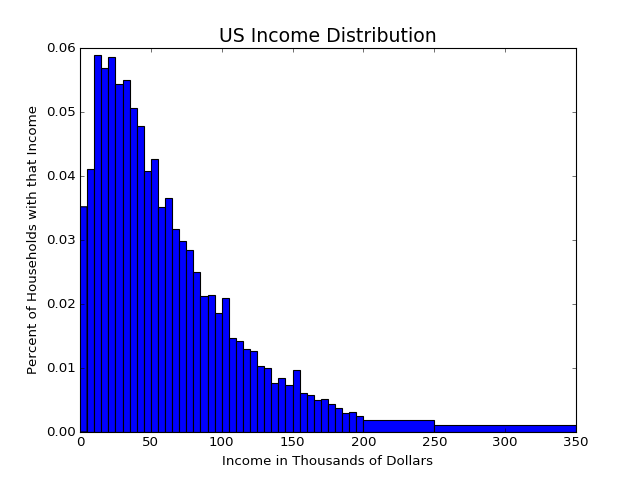

In [2]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

income  = np.loadtxt('usincmoms.txt')
#print(income)
#print(len(income))

print(income[:,0])

# change the value of income to be in thousands of dollars and then divide the frequencies for the two large bins at end
income_per_thou = income[:,1]/1000
income_perc = np.copy(income[:,0])
weights = income[:,0]
weights[40] = income[40,0]/10
weights[41] = income[41,0]/20
bins = list(range(0,205,5)) + [250,350]

print(len(bins + [np.infty]))
print(income_perc)
print(weights)

# plot the histogram of income as described in question
plt.hist(income_per_thou, bins = bins, weights = weights)
plt.title('US Income Distribution', fontsize=17)
plt.xlabel(r'Income in Thousands of Dollars')
plt.ylabel(r'Percent of Households with that Income')

Question 1 Part (b)

In [3]:
def lognorm_pdf(xvals, mu, sigma):

    pdf_vals    = (1/(sigma * np.sqrt(2 * np.pi) * xvals) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

def norm_pdf(xvals, mu, sigma):
    
    pdf_vals    = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals


In [4]:
def model_moments(mu, sigma, bins):

    model_mom_list = [] #np.empty([1,42])
    bins[0] = 1e-8
    bins = bins + [np.infty]
    xfx = lambda x: lognorm_pdf(x, mu, sigma)
    
    for i in range(1,len(bins)-1):
        #model_mom_list[i-1] = intgr.quad(xfx, bins[i-1], bins[i])[0]
        model_mom_list.append(intgr.quad(xfx, bins[i-1], bins[i])[0])
    
    return model_mom_list


def err_vec(mu, sigma, bins, weights, simple):

    #mean_data, var_data = data_moments(xvals)
    moms_data = np.array([weights])
    moms_model = model_moments(mu, sigma, bins)
    #moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):

    mu, sigma = params
    W, weights, bins = args
    err = err_vec(mu, sigma, bins, weights, simple=False)
    crit_val = np.dot(np.dot(err, W), err.T) 
    
    return crit_val

In [5]:
#len(model_moments(500,100,bins))
#W_hat = np.diag(weights,0)
#gmm_args = (income_per_thou,W_hat)
#criterion(np.array([500,100]), 
#err_vec(10, 10, bins, weights, simple=False)
#mu_check, sig_check = 16.4984125712, 8.6947160309
#print(np.array(err_vec(mu_check, sig_check, bins, weights, simple=False)))
#criterion(np.array([mu_check, sig_check]), (W_hat, weights, bins))
#print(weights)
#print(income[:,0])

[ 0.03519016  0.04106206  0.05885948  0.05683611  0.0585952   0.05443284
  0.0550605   0.05067515  0.04785894  0.04083908  0.04269728  0.03509931
  0.03660239  0.03168022  0.02978073  0.0285089   0.0250733   0.02119173
  0.02142297  0.01859025  0.02086964  0.01462609  0.01422967  0.01295784
  0.01271834  0.0103894   0.01000124  0.00758145  0.00851468  0.00737498
  0.0096296   0.00611141  0.00575629  0.00503778  0.00509559  0.00437709
  0.00379898  0.00299789  0.00313829  0.0025767   0.00189701  0.00115952]
[ 0.03519016  0.04106206  0.05885948  0.05683611  0.0585952   0.05443284
  0.0550605   0.05067515  0.04785894  0.04083908  0.04269728  0.03509931
  0.03660239  0.03168022  0.02978073  0.0285089   0.0250733   0.02119173
  0.02142297  0.01859025  0.02086964  0.01462609  0.01422967  0.01295784
  0.01271834  0.0103894   0.01000124  0.00758145  0.00851468  0.00737498
  0.0096296   0.00611141  0.00575629  0.00503778  0.00509559  0.00437709
  0.00379898  0.00299789  0.00313829  0.0025767   

In [17]:
mu_init = 10 #np.log(np.average(income[:,1], weights = income[:,0]))
sig_init = 10
print('Initial mu_0=', mu_init, 'Initial sigma_0=', sig_init)
params_init = np.array([mu_init, sig_init])
W_hat = np.diag(income_perc,0)
gmm_args = (W_hat, weights, bins)
#results = opt.minimize(criterion, params_init, args=(gmm_args), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
minimizer_kwargs = dict(method="L-BFGS-B", 
                       bounds= ((None, None), (1e-10, None)),
                       args = gmm_args)
results = opt.basinhopping(criterion, params_init, minimizer_kwargs= minimizer_kwargs)
print(results)
mu_GMM1, sig_GMM1 = results.x
max_crit = results.fun
#max_crit = criterion(np.array([mu_GMM1,sig_GMM1]),([income_per_thou, W_hat]))
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1, 'Minimized Criterion=', max_crit)
print(np.array(model_moments(mu_GMM1,sig_GMM1,bins)))
print(np.array(model_moments(mu_GMM1,sig_GMM1,bins)).sum())

Initial mu_0= 10 Initial sigma_0= 10
                        fun: array([[ 0.89933416]])
 lowest_optimization_result:       fun: array([[ 0.89933416]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.33066907e-08,   1.11022302e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([ 41.39497053,  23.09210436])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1638
                        nit: 100
                          x: array([ 41.39497053,  23.09210436])
mu_GMM1= 41.3949705282  sig_GMM1= 23.0921043641 Minimized Criterion= [[ 0.89933416]]
[ 0.03765822  0.0027855   0.00169641  0.00123428  0.00097516  0.00080841
  0.00069174  0.00060536  0.00053873  0.00048572  0.0004425   0.00040656
  0.00037619  0.00035018  0.00032763  0.00030791  0.00029049  0.00027501
  0.0

<IPython.core.display.Javascript object>


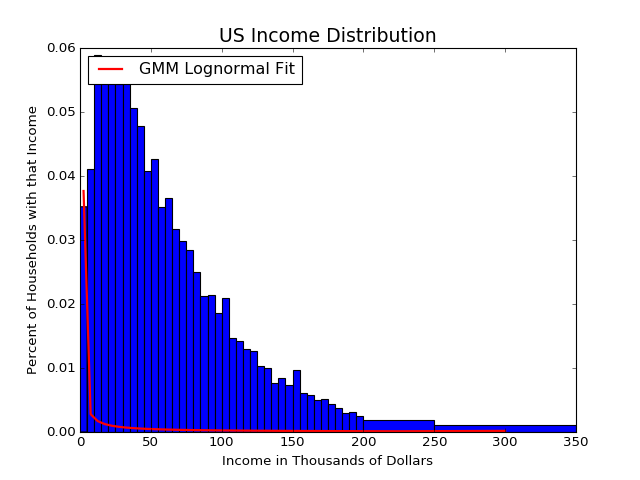

In [18]:
%matplotlib notebook
plt.hist(income_per_thou, bins = bins, weights = weights)
# Plot the MLE estimated distribution
moments_plot = model_moments(mu_GMM1, sig_GMM1, bins)
moments_plot[40] = moments_plot[40]/10
moments_plot[41] = moments_plot[41]/10

plt.plot(income_per_thou, moments_plot,
         linewidth=2, color='r', label='GMM Lognormal Fit')
plt.legend(loc='upper left')
plt.title('US Income Distribution', fontsize=17)
plt.xlabel(r'Income in Thousands of Dollars')
plt.ylabel(r'Percent of Households with that Income')

Question 1 Part (c)

In [7]:
import scipy.special as spe

def gamma_pdf(xvals, alpha, beta):
        
    #pdf_vals = ((pow(xvals,alpha-1))*np.exp(-xvals/beta))/(spe.gamma(alpha)*(pow(beta,alpha)))
    pdf_vals = xvals**(alpha-1)*(np.exp(-xvals/beta)/(spe.gamma(alpha)*beta**alpha))
    #pdf_vals = sts.gamma.pdf(xvals, alpha, loc = 0, scale = beta)
    
    return pdf_vals

In [8]:
def model_moments_gamma(alpha, beta, bins):

    model_mom_list = [] #np.empty([1,42])
    bins[0] = 1e-8
    bins = bins + [np.infty]
    xfx = lambda x: gamma_pdf(x, alpha, beta)
    
    for i in range(1,len(bins)-1):
        #model_mom_list[i-1] = intgr.quad(xfx, bins[i-1], bins[i])[0]
        model_mom_list.append(intgr.quad(xfx, bins[i-1], bins[i])[0])
    
    return model_mom_list


def err_vec_gamma(alpha, beta, bins, weights, simple):

    #mean_data, var_data = data_moments(xvals)
    moms_data = np.array([weights])
    moms_model = model_moments_gamma(alpha, beta, bins)
    #moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def criterion_gamma(params, *args):

    alpha, beta = params
    W, weights, bins = args
    err = err_vec_gamma(alpha, beta, bins, weights, simple=False)
    crit_val = np.dot(np.dot(err, W), err.T) 
    
    return crit_val

In [25]:
alpha_init = 3
beta_init = 20
print('Initial alpha_0=', alpha_init, 'Initial beta_0=', beta_init)
params_init1 = np.array([alpha_init, beta_init])
W_hat1 = np.diag(income_perc,0)
gmm_args1 = (W_hat1, income_perc, bins)
#results_gamma = opt.minimize(criterion_gamma, params_init1, args=(gmm_args1), method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
minimizer_kwargs1 = dict(method="L-BFGS-B", 
                       bounds= ((1e-10, None), (1e-10, None)),
                       args = gmm_args1)
results_gamma = opt.basinhopping(criterion_gamma, params_init1, minimizer_kwargs= minimizer_kwargs1)
print(results_gamma)
alpha_GMM1, beta_GMM1 = results_gamma.x
max_crit_gamma = results_gamma.fun
#max_crit = criterion(np.array([mu_GMM1,sig_GMM1]),([income_per_thou, W_hat]))
print('alpha_GMM1=', alpha_GMM1, ' beta_GMM1=', beta_GMM1, 'Minimized Criterion=', max_crit_gamma)
print(np.array(model_moments_gamma(alpha_GMM1,beta_GMM1,bins)))
print(np.array(model_moments_gamma(alpha_GMM1,beta_GMM1,bins)).sum())

Initial alpha_0= 3 Initial beta_0= 20
                        fun: array([[ 0.01408492]])
 lowest_optimization_result:       fun: array([[ 0.01408492]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.86229374e-08,  -1.04083409e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([  1.36707366,  48.06196315])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4506
                        nit: 100
                          x: array([  1.36707366,  48.06196315])
alpha_GMM1= 1.36707365529  beta_GMM1= 48.0619631522 Minimized Criterion= [[ 0.01408492]]
[ 0.03511621  0.0502838   0.05486612  0.05600899  0.0553817   0.05374044
  0.05150274  0.04892331  0.04616647  0.04334172  0.04052312  0.03776092
  0.03508883  0.03252889  0.03009474  0.02779395  0.02562973  0.02360207

<IPython.core.display.Javascript object>


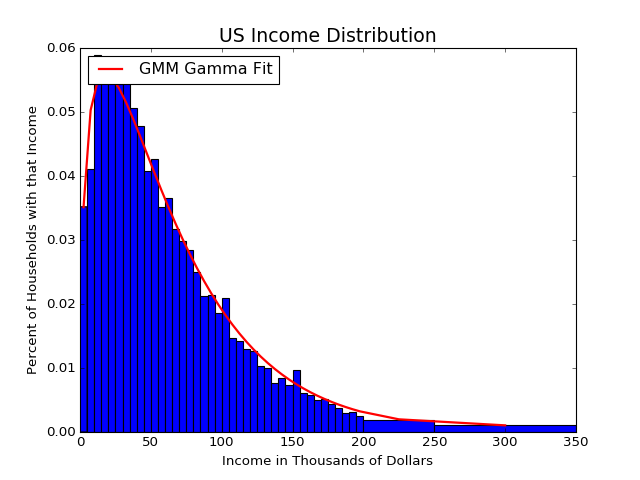

In [26]:
%matplotlib notebook
plt.hist(income_per_thou, bins = bins, weights = weights)
# Plot the MLE estimated distribution
moments_plot_gamma = model_moments_gamma(alpha_GMM1, beta_GMM1, bins)
moments_plot_gamma[40] = moments_plot_gamma[40]/10
moments_plot_gamma[41] = moments_plot_gamma[41]/10

plt.plot(income_per_thou, moments_plot_gamma,
         linewidth=2, color='r', label='GMM Gamma Fit')
plt.legend(loc='upper left')
plt.title('US Income Distribution', fontsize=17)
plt.xlabel(r'Income in Thousands of Dollars')
plt.ylabel(r'Percent of Households with that Income')

Question 1 Part (d)

<IPython.core.display.Javascript object>


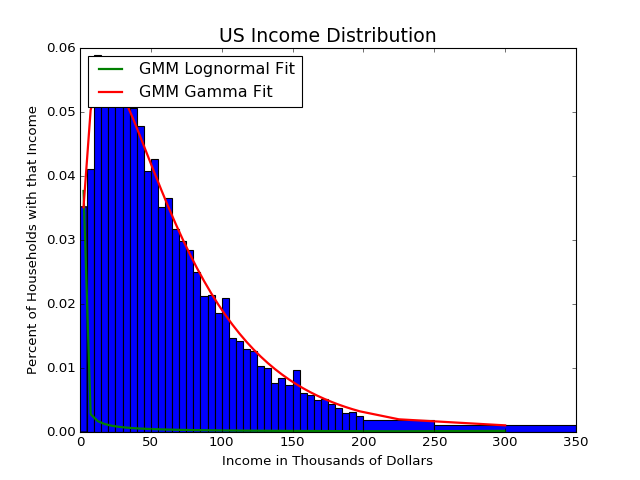

In [27]:
%matplotlib notebook
plt.hist(income_per_thou, bins = bins, weights = weights)
# Plot the MLE estimated distribution
moments_plot_gamma = model_moments_gamma(alpha_GMM1, beta_GMM1, bins)
moments_plot_gamma[40] = moments_plot_gamma[40]/10
moments_plot_gamma[41] = moments_plot_gamma[41]/10

plt.plot(income_per_thou, moments_plot, linewidth=2, color='g', label='GMM Lognormal Fit')
plt.plot(income_per_thou, moments_plot_gamma, linewidth=2, color='r', label='GMM Gamma Fit')
plt.legend(loc='upper left')
plt.title('US Income Distribution', fontsize=17)
plt.xlabel(r'Income in Thousands of Dollars')
plt.ylabel(r'Percent of Households with that Income')

Question 1 Part (e)

In [38]:
#err1 = err_vec_gamma(alpha_GMM1, beta_GMM1, bins, income[:,0], False)
err1 = err_vec_gamma(alpha_GMM1, beta_GMM1, bins, income_perc, False)
print(err1)
VCV2 = np.dot(err1.T, err1) / weights.shape[0]
print(VCV2)
#print(len(VCV2))
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)
print(weights.shape[0])

[[-0.00210127  0.22458054 -0.06784568 -0.0145526  -0.05484245 -0.01272023
  -0.06461532 -0.03457001 -0.03536372  0.06128052 -0.05092026  0.07583085
  -0.04135122  0.02678853  0.01054391 -0.02507793  0.02219223  0.11373982
   0.01333795  0.07291546 -0.12273226  0.14798173  0.08128146  0.08731654
   0.01373386  0.13491583  0.07759163  0.29862084  0.05580069  0.11252084
  -0.22268565  0.11693406  0.08100969  0.12560136  0.01376917  0.07479137
   0.12743447  0.3003847   0.13034441  0.25241437  0.04480132 -0.5520369 ]]
[[  1.05126875e-07  -1.12358090e-05   3.39433271e-06 ...,  -1.26283412e-05
   -2.24141887e-06   2.76185161e-05]
 [ -1.12358090e-05   1.20086709e-03  -3.62781392e-04 ...,   1.34969892e-03
    2.39559621e-04  -2.95182722e-03]
 [  3.39433271e-06  -3.62781392e-04   1.09596091e-04 ...,  -4.07743420e-04
   -7.23708509e-05   8.91745640e-04]
 ..., 
 [ -1.26283412e-05   1.34969892e-03  -4.07743420e-04 ...,   1.51697651e-03
    2.69249915e-04  -3.31766775e-03]
 [ -2.24141887e-06   2.39

In [45]:
#print('Initial alpha_0=', alpha_init, 'Initial beta_0=', beta_init)
params_init_gamma2 = np.array([alpha_GMM1, beta_GMM1])
#params_init_gamma2 = np.array([1.836, 27.84])
print('Initial alpha = ', alpha_GMM1, 'Initial beta = ', beta_GMM1)
#W_hat = np.diag(weights,0)
gmm_args_gamma2 = (W_hat2, income_perc, bins)
#results_gamma2 = opt.minimize(criterion_gamma, params_init_gamma2, args=(gmm_args_gamma2), method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
minimizer_kwargs2 = dict(method="L-BFGS-B", 
                       bounds= ((1e-10, None), (1e-10, None)),
                       args = gmm_args_gamma2)
results_gamma2 = opt.basinhopping(criterion_gamma, params_init_gamma2, niter = 100, minimizer_kwargs= minimizer_kwargs2)
print(results_gamma2)
alpha_GMM2, beta_GMM2 = results_gamma2.x
max_crit_gamma2 = results_gamma2.fun
#max_crit = criterion(np.array([mu_GMM1,sig_GMM1]),([income_per_thou, W_hat]))
print('alpha_GMM2=', alpha_GMM2, ' beta_GMM2=', beta_GMM2, 'Minimized Criterion=', max_crit_gamma2)
print(np.array(model_moments_gamma(alpha_GMM2,beta_GMM2,bins)))
print(np.array(model_moments_gamma(alpha_GMM2,beta_GMM2,bins)).sum())

Initial alpha =  1.36707365529 Initial beta =  48.0619631522


C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Kyle\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Kyle\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the su

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


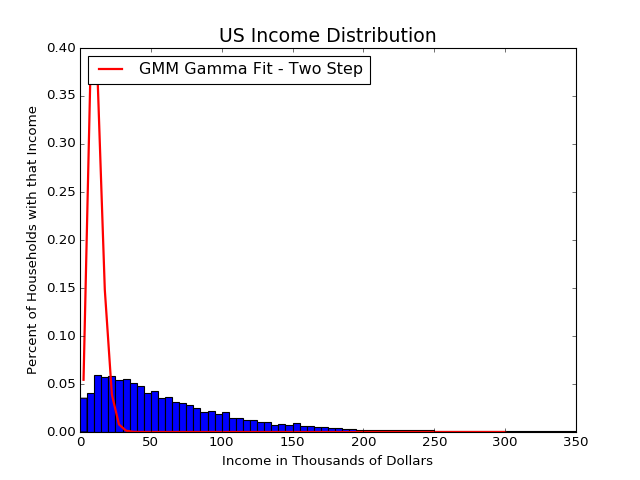

In [44]:
%matplotlib notebook
plt.hist(income_per_thou, bins = bins, weights = weights)
# Plot the MLE estimated distribution
moments_plot_gamma2 = model_moments_gamma(alpha_GMM2, beta_GMM2, bins)
moments_plot_gamma2[40] = moments_plot_gamma2[40]/10
moments_plot_gamma2[41] = moments_plot_gamma2[41]/10

#plt.plot(income_per_thou, moments_plot, linewidth=2, color='g', label='GMM Lognormal Fit')
plt.plot(income_per_thou, moments_plot_gamma2, linewidth=2, color='r', label='GMM Gamma Fit - Two Step')
plt.legend(loc='upper left')
plt.title('US Income Distribution', fontsize=17)
plt.xlabel(r'Income in Thousands of Dollars')
plt.ylabel(r'Percent of Households with that Income')